In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics

# 0301a

In [2]:
# Import data
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


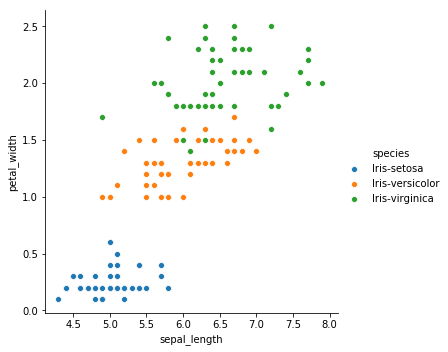

In [3]:
# Visualize
sns.pairplot(x_vars=["sepal_length"], y_vars=["petal_width"], data=df, hue="species", height=5)

In [15]:
# Select data
x = df[['sepal_length','petal_width']].values
y = df['species'].values

# Enclode categorial var
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

# Split training and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/4)

# Scaling
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [39]:
# Perceptron classifier training
ppt = Perceptron(max_iter=500, eta0 = 0.1)
ppt.fit(x_train,y_train)

# Test data
y_pred = ppt.predict(x_test)

# Compile test data and predictions
test = pd.DataFrame({'sepal_length':x_test[:,0], 'petal_width':x_test[:,1], 'true_label':y_test, 'predicted_label':y_pred})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [40]:
# Evaluation
print(metrics.classification_report(y_test, y_pred))
print("Accuracy of the model:", round(metrics.accuracy_score(y_test,y_pred)*100),"%")

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.80      0.92      0.86        13
           2       1.00      0.80      0.89        15

   micro avg       0.89      0.89      0.89        38
   macro avg       0.90      0.91      0.90        38
weighted avg       0.91      0.89      0.89        38

Accuracy of the model: 89.0 %


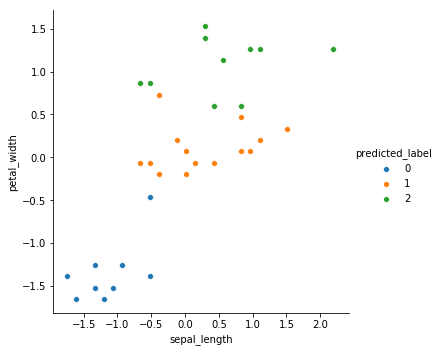

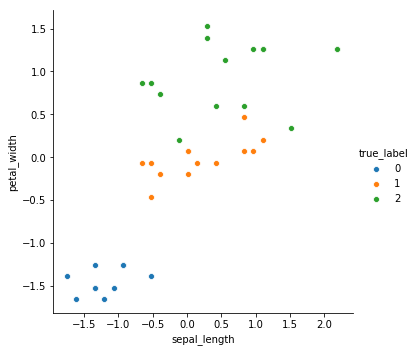

In [26]:
# Plot test
sns.pairplot(x_vars=["sepal_length"], y_vars=["petal_width"], data=test, hue="predicted_label", height=5)
sns.pairplot(x_vars=["sepal_length"], y_vars=["petal_width"], data=test, hue="true_label", height=5)
plt.show()